### Part 1 Looking at the decision boundaries of various Classifiers

Here we will classify red dots and blue dots from a generated toy dataset using different standard classifiers and try to understand their characteristics from their decision boundaries.

First lets import some standard packages

In [1]:
# Package imports
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import sklearn.datasets
import sklearn.linear_model
import matplotlib

# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

Let us now generate a dataset to classify between red dots and blue dots using the make_moons function of sklearn

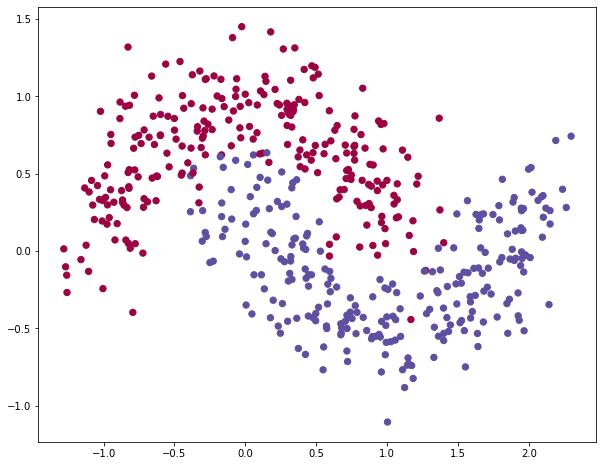

In [2]:
# Generate a dataset and plot it
np.random.seed(0)
X, y = sklearn.datasets.make_moons(500, noise=0.20)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

Our goal is to find a decision boundary that seperates the whole region into red region and blue region. Let us try our first model Logistic regression

In [3]:
# Train the linear regression classifier
clf = sklearn.linear_model.LinearRegression()
clf.fit(X, y)

LinearRegression()

Now let's plot the decision boundary of this classifier

In [4]:
# Helper function to plot a decision boundary.
# If you don't fully understand this function don't worry, it just generates the contour plot below.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

Text(0.5, 1.0, 'Logistic Regression')

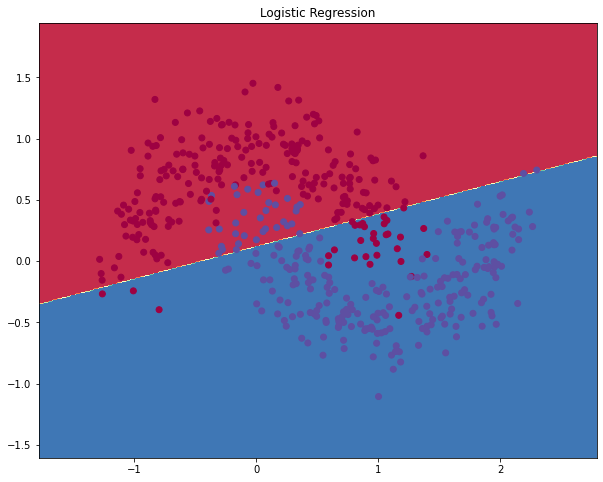

In [5]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")

So it was able to do an okay job. Logistic regression is a linear classifier  and we can see that it is unable to deal well with the non linearity of the distribution. Now let us try a non-linear model K nearest neighbour

In [6]:
from sklearn.neighbors import KNeighborsClassifier

In [7]:
knn = KNeighborsClassifier(n_neighbors=10)

In [8]:
knn.fit(X, y)


KNeighborsClassifier(n_neighbors=10)

Text(0.5, 1.0, 'K nearest neighbour')

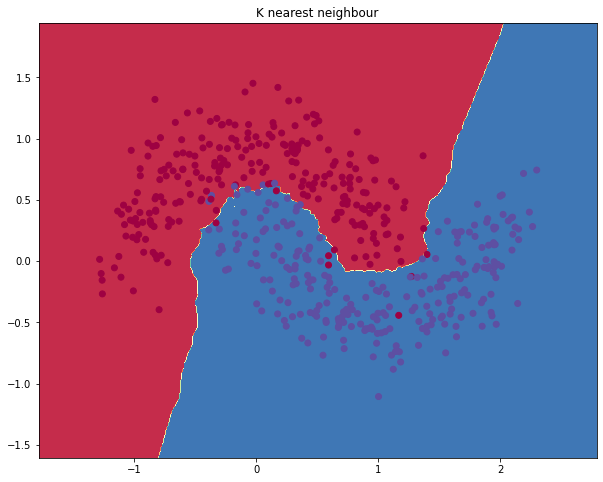

In [9]:
# Plot the decision boundary
plot_decision_boundary(lambda x: knn.predict(x))
plt.title("K nearest neighbour")

Much better! Here the kNN classifier works very well because of the 1) smallness of the dataset 2) low number of input dimensions(here it is just 2 dimensions)

#### Exercize : Check how the decision boundary changes with different n_neighbour values.


Now let us plot the same using a neural network classifier. Here I will be using sklearn MLP classifier.


In [10]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

#Initializing the MLPClassifier
classifier = MLPClassifier(hidden_layer_sizes=(64,64,10), max_iter=300,activation = 'relu',solver='adam',random_state=1)



In [11]:
classifier.fit(X, y)

MLPClassifier(hidden_layer_sizes=(64, 64, 10), max_iter=300, random_state=1)

Text(0.5, 1.0, 'Multilayer Perceptron')

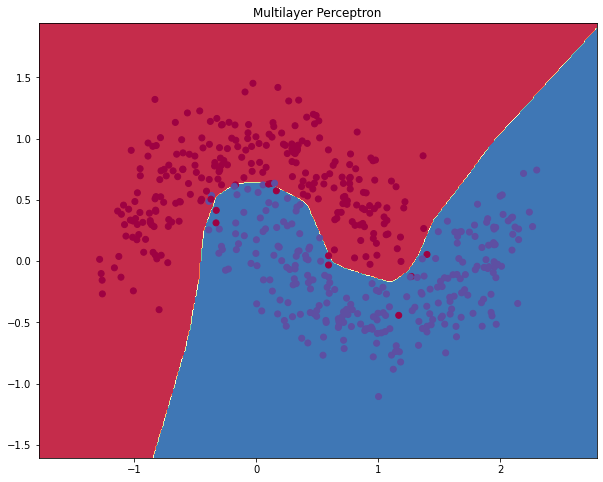

In [12]:
# Plot the decision boundary
plot_decision_boundary(lambda x: classifier.predict(x))
plt.title("Multilayer Perceptron")

The neural network was able to find a much smoother decision boundary than kNN. 